In [1]:
!git clone https://github.com/alirezatwk/Convolutional-Neural-Network-Based-Image-Watermarking-using-Discrete-Wavelet-Transform.git
%cd Convolutional-Neural-Network-Based-Image-Watermarking-using-Discrete-Wavelet-Transform


Cloning into 'Convolutional-Neural-Network-Based-Image-Watermarking-using-Discrete-Wavelet-Transform'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 178 (delta 95), reused 141 (delta 59), pack-reused 0 (from 0)
Receiving objects: 100% (178/178), 7.73 MiB | 12.63 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/Convolutional-Neural-Network-Based-Image-Watermarking-using-Discrete-Wavelet-Transform


In [2]:
!pip install tensorflow==2.10.0 pywavelets scikit-image matplotlib opencv-python


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.10.0


In [3]:
from google.colab import files
uploaded = files.upload()


Saving dataset.rar to dataset.rar


In [4]:
import os

rar_path = "dataset.rar"
extract_path = "/content/"

os.makedirs(extract_path, exist_ok=True)

!unrar x -y "{rar_path}" "{extract_path}/"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from dataset.rar

Creating    /content//dataset                                         OK
Creating    /content//dataset/test                                    OK
Extracting  /content//dataset/test/000015.png                              0%  OK 
Extracting  /content//dataset/test/000031 (2).png                          0%  OK 
Extracting  /content//dataset/test/000031.png                              0%  OK 
Extracting  /content//dataset/test/000033 (3).png                          0%  OK 
Extracting  /content//dataset/test/000033 (9).png                          0%  OK 
Extracting  /content//dataset/test/000040 (2).png                          0%  OK 
Extracting  /content//dataset/test/000040 (5).png                          0%  OK 
Extracting  /content//dataset/test/000051 (4).png                          0%  1%  OK 
Extra

In [5]:
import os

base = "/content/dataset"   # change if your folder name is different
print(os.listdir(base))


['train', 'test', 'val']


In [6]:
import os
print(os.listdir("/content/dataset/train"))


['Tr-me_0129.jpg', '000133 (2).png', '000036 (7).png', 'Te-no_0173.jpg', 'Te-gl_0034.jpg', 'Te-no_0164.jpg', '000086 (8).png', '000108 (6).png', 'Te-gl_0050.jpg', '000010.png', 'Te-no_0049.jpg', '10.png', 'Te-gl_0117.jpg', '000080 (10).png', 'Te-gl_0115.jpg', 'Tr-me_0066.jpg', 'Tr-me_0126.jpg', 'Tr-pi_0059.jpg', '000115 (9).png', 'Tr-pi_0035.jpg', 'Te-gl_0067.jpg', '000077 (6).png', '12 (2) - Copy.png', '000031 (3).png', '000077 (9).png', '000123 (9).png', '000141 (2).png', '000113.png', '000058 (4).png', 'Te-no_0140.jpg', 'Te-no_0189.jpg', 'Te-gl_0013.jpg', '000054 (5).png', 'Te-gl_0102.jpg', '000158 (4).png', 'Te-no_0090.jpg', 'Te-no_0057.jpg', 'Te-gl_0049.jpg', 'Tr-me_0044.jpg', 'Tr-me_0086.jpg', 'Tr-pi_0081.jpg', '8 - Copy (2) - Copy.png', 'Tr-me_0101.jpg', '11 - Copy.png', 'Tr-pi_0023.jpg', 'Tr-pi_0048.jpg', '000148 (6).png', 'Te-gl_0112.jpg', 'Tr-pi_0065.jpg', 'Te-gl_0088.jpg', 'Tr-me_0060.jpg', '000149 (7).png', '000026 (2).png', 'Te-gl_0094.jpg', 'Tr-me_0063.jpg', 'Te-no_0075.j

In [7]:
import os
import numpy as np
import cv2
import random

IMAGE_SIZE = (256, 256, 1)
WATERMARK_SIZE = (16 * 16,)  # 256 bits watermark

def load_random_watermark():
    return np.random.randint(0, 2, size=(256,), dtype=np.float32)

def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)
    return img

def data_generator(folder, batch_size=4):
    files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg",".png",".jpeg"))]
    paths = [os.path.join(folder, f) for f in files]

    while True:
        batch_imgs = []
        batch_wm = []

        for _ in range(batch_size):
            img_path = random.choice(paths)
            img = load_image(img_path)
            wm = load_random_watermark()

            batch_imgs.append(img)
            batch_wm.append(wm)

        yield (np.array(batch_imgs), np.array(batch_wm))


In [8]:
models/wavetf_model.py


NameError: name 'models' is not defined

Upload the IMAGE to watermark:


Saving 7 - Copy.png to 7 - Copy.png
Upload the WATERMARK:


Saving watermark-logo.png to watermark-logo.png
Training for 200 epochs...
Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - Decoder_loss: 0.2117 - Encoder_loss: 0.1026 - loss: 0.3144
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - Decoder_loss: 0.1887 - Encoder_loss: 0.0890 - loss: 0.2777
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - Decoder_loss: 0.1636 - Encoder_loss: 0.0842 - loss: 0.2478
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - Decoder_loss: 0.1357 - Encoder_loss: 0.0807 - loss: 0.2164
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - Decoder_loss: 0.1089 - Encoder_loss: 0.0731 - loss: 0.1820
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - Decoder_loss: 0.0869 - Encoder_loss: 0.0614 - loss: 0.1483
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - Decoder_loss: 0.0725 - Encoder_loss: 0.0502 - loss: 0.1228
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - Decoder_loss: 0.0651 - Encoder_loss: 0.0412 - loss: 0.1064
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - Dec

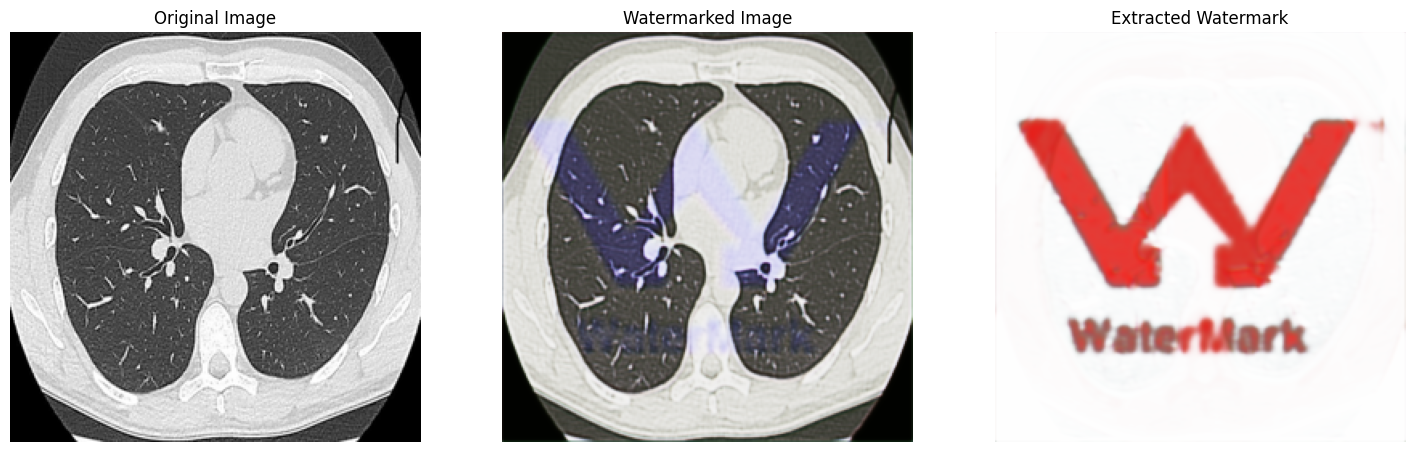

In [10]:
# ================================================================
# 1) INSTALL PACKAGES
# ================================================================
!pip install tensorflow pillow numpy matplotlib

import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files


# ================================================================
# 2) UPLOAD IMAGE FIRST
# ================================================================
print("Upload the IMAGE to watermark:")
uploaded = files.upload()

image_path = list(uploaded.keys())[0]

# Load image
def load_image(path, size=(256,256)):
    img = Image.open(path).convert("RGB").resize(size)
    return np.array(img) / 255.0

image = load_image(image_path)     # (256,256,3)


# ================================================================
# 3) UPLOAD WATERMARK AFTERWARDS
# ================================================================
print("Upload the WATERMARK:")
uploaded_wm = files.upload()

watermark_path = list(uploaded_wm.keys())[0]

watermark = load_image(watermark_path)   # (256,256,3)

# Resize watermark small (hardcoded)
wm_small = Image.fromarray((watermark*255).astype(np.uint8)).resize((64,64))
wm_small = np.array(wm_small)/255.0

# Expand watermark to image size
def expand_watermark(wm, size=(256,256)):
    wm = Image.fromarray((wm*255).astype(np.uint8)).resize(size)
    return np.array(wm)/255.0

watermark_big = expand_watermark(wm_small)

# Input = image + wm (6 channels)
X_input = np.concatenate([image, watermark_big], axis=-1)
X_input = np.expand_dims(X_input, 0)

# Ground truth targets
y_image_target = np.expand_dims(image, 0)        # want output close to original
y_wm_target = np.expand_dims(watermark_big, 0)   # decoder should extract wm


# ================================================================
# 4) BUILD ENCODER (IMAGE + WM → WATERMARKED IMAGE)
# ================================================================
def build_encoder():
    inp = tf.keras.Input(shape=(256,256,6))
    x = tf.keras.layers.Conv2D(32,3,padding="same",activation="relu")(inp)
    x = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x)
    x = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x)
    out = tf.keras.layers.Conv2D(3,3,padding="same",activation="sigmoid")(x)
    return tf.keras.Model(inp, out, name="Encoder")

encoder = build_encoder()


# ================================================================
# 5) BUILD DECODER (WATERMARKED IMAGE → EXTRACTED WM)
# ================================================================
def build_decoder():
    inp = tf.keras.Input(shape=(256,256,3))
    x = tf.keras.layers.Conv2D(32,3,padding="same",activation="relu")(inp)
    x = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x)
    x = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x)
    out = tf.keras.layers.Conv2D(3,3,padding="same",activation="sigmoid")(x)
    return tf.keras.Model(inp, out, name="Decoder")

decoder = build_decoder()


# ================================================================
# 6) CONNECT FULL MODEL
# ================================================================
inp = tf.keras.Input(shape=(256,256,6))
watermarked = encoder(inp)
wm_extracted = decoder(watermarked)

model = tf.keras.Model(inp, [watermarked, wm_extracted])

model.compile(
    optimizer="adam",
    loss=["mse", "mse"],
    loss_weights=[1.0, 1.0]
)


# ================================================================
# 7) TRAIN
# ================================================================
print("Training for 200 epochs...")
model.fit(
    X_input,
    [y_image_target, y_wm_target],
    epochs=200,
    verbose=1
)


# ================================================================
# 8) PREDICT WATERMARKED IMAGE + EXTRACTED WM
# ================================================================
watermarked_image = encoder.predict(X_input)[0]
extracted_wm = decoder.predict(np.expand_dims(watermarked_image,0))[0]


# ================================================================
# 9) SHOW RESULTS
# ================================================================
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(watermarked_image)
plt.title("Watermarked Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(extracted_wm)
plt.title("Extracted Watermark")
plt.axis("off")

plt.show()
